In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

 **Reading Telco-Customer-Churn.csv File**

In [2]:
dataset = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Analyzing Data**

In [3]:
# m            -- Number of Training examples
# shape         -- Shape of the dataset

m = dataset.shape[0]
shape = dataset.shape

print('Number of Training examples :',m)
print('The shape of the dataset    :',shape)

Number of Training examples : 7043
The shape of the dataset    : (7043, 21)


**Types of  Data Values**

In [4]:
print(dataset.dtypes)
# It seems that we have only a few numeric values and other object type.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
#The datatype of TotalCharges is object which is inapproriate
dataset['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [6]:
#It seems that TotalCharges has numeric values lets convert object to numeric value

In [7]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [8]:
#Our TotalCharges column has ' '. Therefore we need to process those cells
dataset['TotalCharges'] = dataset['TotalCharges'].map(lambda x: '' if x ==' ' else x)
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

In [9]:
dataset['TotalCharges'].dtype=='object'

False

In [10]:
#Now lets replace NaN values with mode
dataset['TotalCharges'].fillna(dataset['TotalCharges'].mode()[0],inplace=True)

In [11]:
#Converting Churn to Numeric Type
dataset['Churn'] = dataset['Churn'].map(lambda x:1 if x=='Yes' else 0)

**Finding Missing Values if any**

In [12]:
dataset.isnull().values.any()
#Looks like that we do not have any other missing values.

False

In [13]:
#Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Exploring Categorical Variables
categorical_variables = []
for cols in dataset.columns:
    if(dataset[cols].dtype=='object'):
        categorical_variables.append(cols)
print(categorical_variables)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [15]:
# There is no utility of customerID as a categorical variable
categorical_variables.remove('customerID')

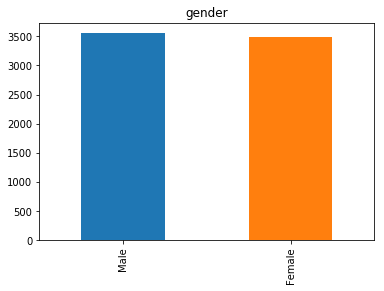

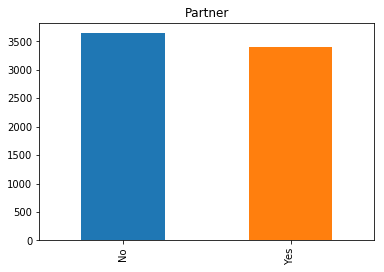

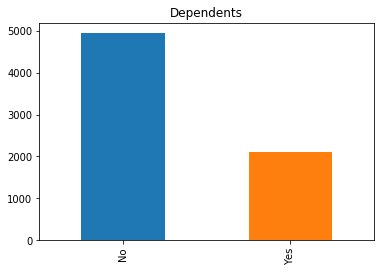

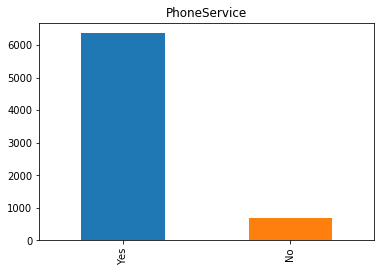

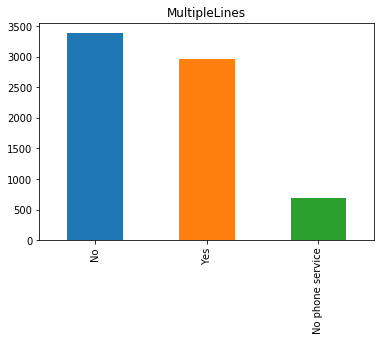

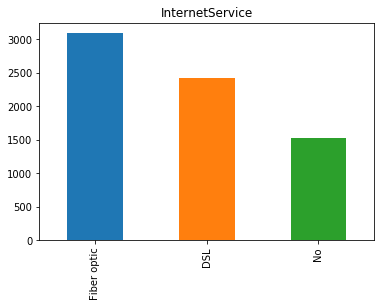

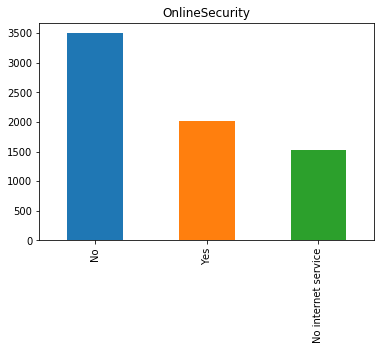

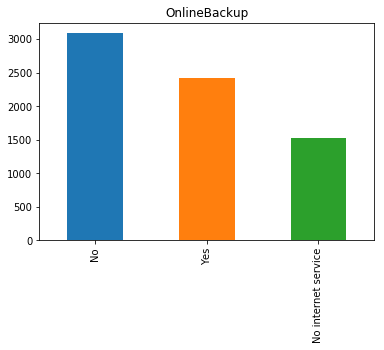

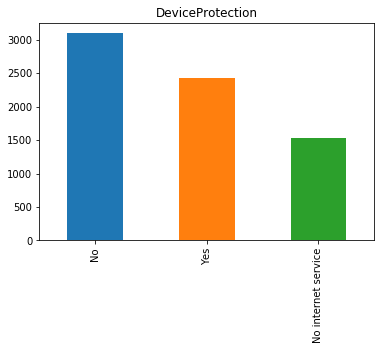

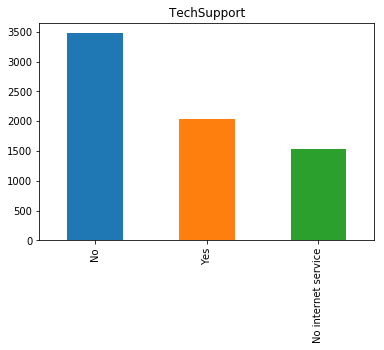

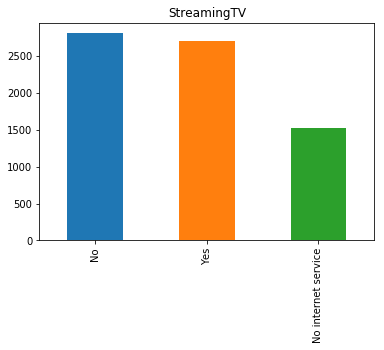

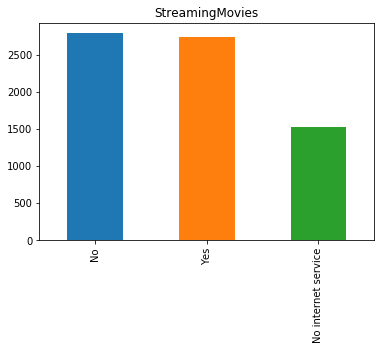

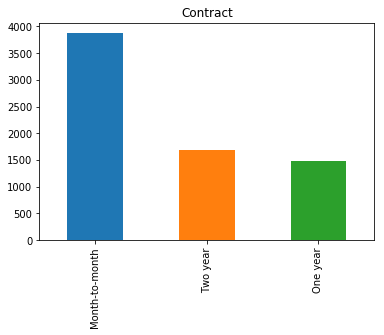

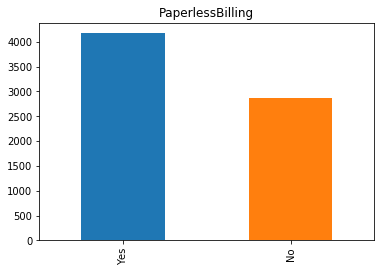

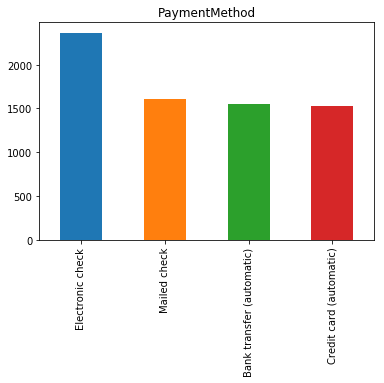

In [16]:
for cols in categorical_variables:
    plt.figure()
    dataset[cols].value_counts().plot.bar(title=cols)
plt.show()

> Insights from the data
* There are almost equal distribution of male and female in dataset
* The number of people with or without parter are almost equal
* There number of non dependends are 2.5 x the number of dependends
* There are about 90% of people who use PhoneServices
* Almost 60% of people has either single lines or no phone services
* About 40% of people use FiberOptics and 30% of people use DSL.
* Half of the people do not have OnlineSecurity and 1/5 of people do not have Internet Service. Only 30% of people have OnlineSecurity.
* Only 35% of people have OnlineBackup
*  Only 35% of people have DeviceProtection
* Only 35% of people use TechSupport
* About 40% of people Stream TV
* About 40% of people Stream Movies
*  About 55% of people have monthly contract, and 23% have two-yearly-contract and 22% have yearly contract.
*  About 60% of people use paperless billing
* Electronic check is the most preferred way of payment.

In [17]:
#Exploring Numerical Variables
numerical_variables = []
for cols in dataset.columns:
    if(dataset[cols].dtype!='object'):
        numerical_variables.append(cols)
print(numerical_variables)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


It looks that SeniorCitizen contains 0/1 only.

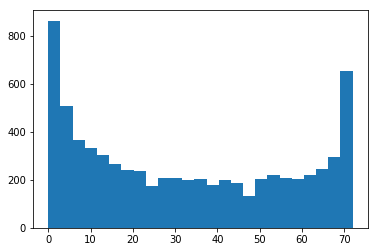

In [18]:
plt.hist(dataset['tenure'],bins=25)
plt.show()

In [19]:
categorical_variables

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


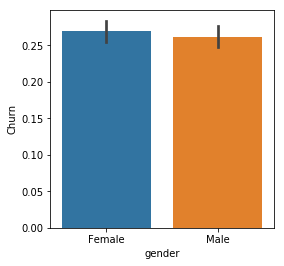

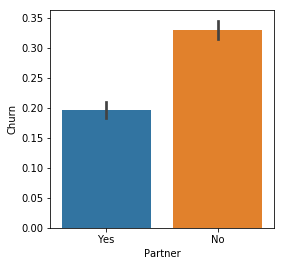

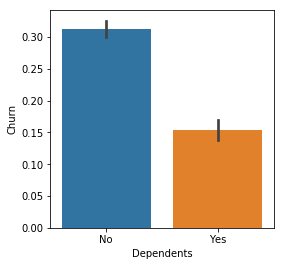

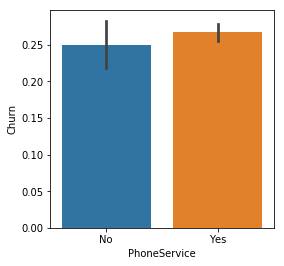

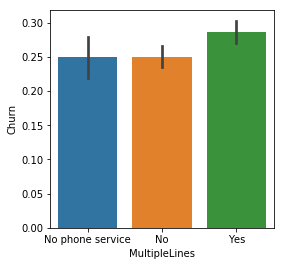

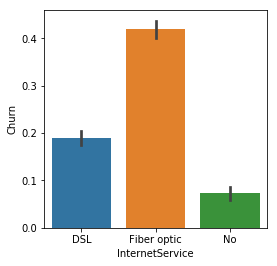

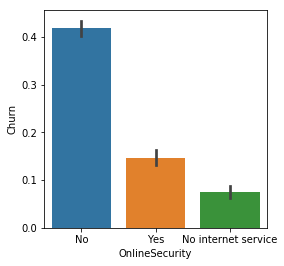

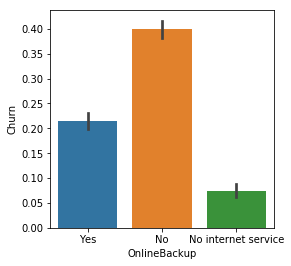

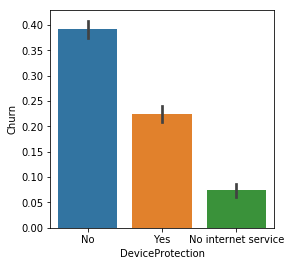

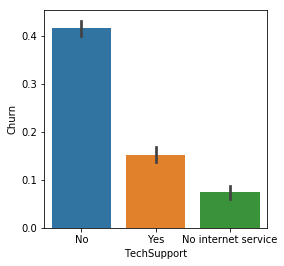

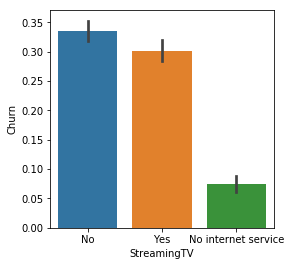

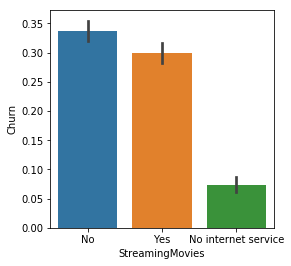

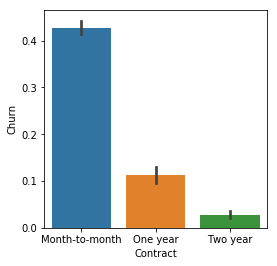

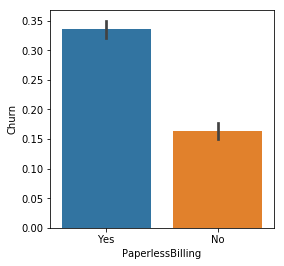

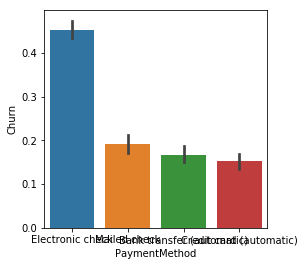

In [20]:
for x in categorical_variables:
    plt.figure(figsize=(4,4))
    sns.barplot(dataset[x],dataset['Churn'])
    print()

> Insights from CategoricalVariables vs Chrun
* Males and Females chrun probability are same
* Persons without Parnters have higher chances to Churn
* Persons without Dependents have higher chances to Churn
* Persons with Phone Service have higher chances to Churn
* Persons with Multiple Lines have higher chances to Churn
* Customers with FiberOptic have higher chances to Churn
* Customers without Online Security have higher chances to Churn
* Customers without Online Backup have higher chances to Churn
* Customers without Device Protection have higher chances to Churn
* Customers without TechSupport have higher chances to Churn
* Customers who do not SreamTV have higher chances to Churn
* Customers who do not SreamMovies have higher chances to Churn
* Customers who are on month to month contract have higher chances to Churn
* Customers who opt for paperless billing have higher chances to churn
* Customers who pay vie Electronic Check have higher chances to churn

** Preprocessing the Data **

In [21]:
dataset.drop(['customerID'],axis=1,inplace=True)

In [22]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [23]:
dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [24]:
#New Shape of the dataset
dataset.shape

(7043, 31)

In [25]:
#Lets divide our dataset into features X and target variable Y
temp = dataset.drop(['Churn'],axis=1)
y = dataset.iloc[:,4:5]
X = temp.iloc[:,:].values
print('Features Shape       :',X.shape)
print('Target Variable Shape:',y.shape)

Features Shape       : (7043, 30)
Target Variable Shape: (7043, 1)


In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
#Performing Feature Scaling on Feature variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Building the Model Using Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[932 109]
 [175 193]]


**Analyzing Accuracy Metrices**

In [30]:
from sklearn.metrics import f1_score,recall_score, precision_score, accuracy_score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f_score = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print('Precision :',precision)
print('Recall    :',recall)
print('Fscore    :',f_score)
print('Accuracy  :',accuracy)

Precision : 0.6390728476821192
Recall    : 0.5244565217391305
Fscore    : 0.5761194029850747
Accuracy  : 0.7984386089425124


**Building Model using RBF Kernel SVM** 

In [31]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred_svm = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

[[932 109]
 [175 193]]


**Analyzing Accuracy of Model**

In [33]:
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred_svm)
f_score = f1_score(y_test,y_pred_svm)
accuracy = accuracy_score(y_test,y_pred_svm)
print('Precision :',precision)
print('Recall    :',recall)
print('Fscore    :',f_score)
print('Accuracy  :',accuracy)

Precision : 0.6390728476821192
Recall    : 0.5244565217391305
Fscore    : 0.5761194029850747
Accuracy  : 0.7984386089425124
